In [3]:
import tensorflow as tf

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist

import keras

In [8]:
image_dim= 28*28
noise_dim= 100

In [9]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

x_train= x_train/255
x_test= x_test/255

x_train= x_train.reshape(-1, image_dim)



In [10]:
def draw_image(image):
  i= image.reshape(28,28)
  plt.figure()
  plt.imshow(i)
  plt.colorbar()


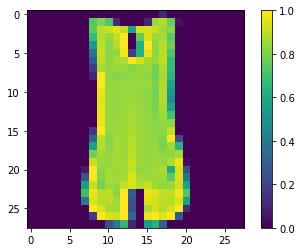

In [14]:
draw_image(x_train[4])



---


# **Lets make the models**


---



In [15]:
def generator(ip_size, op_size):
  model= keras.models.Sequential()
  model.add(keras.layers.Dense(units=256, activation='tanh', input_shape=(ip_size,)))
  model.add(keras.layers.Dense(units=512, activation='tanh'))
  model.add(keras.layers.Dense(units=1024, activation='tanh'))
  model.add(keras.layers.Dense(units=op_size, activation='sigmoid'))
  return model

In [16]:
def discremenetor(ip_size):
  model= keras.models.Sequential()
  model.add(keras.layers.Dense(units=1024, activation='relu', input_shape=(ip_size,)))
  model.add(keras.layers.Dense(units=512, activation='relu'))
  model.add(keras.layers.Dense(units=256, activation='relu'))
  model.add(keras.layers.Dense(units=1, activation='sigmoid'))
  opt= keras.optimizers.SGD(learning_rate=0.005)
  model.compile(optimizer=opt, loss='mse')
  return model


In [34]:
def generate_noise(size, count=1):
  res= list()
  for _ in range(count):
    sampl = np.random.uniform(low=0.0, high=1, size=(size,))
    res.append(sampl)
  return np.array(res)


def get_n_images(n):
  res= list()
  for _ in range(n):
    index= random.randint(0, len(x_train)-1)
    res.append(x_train[index])
  return res


def unison_shuffled_copies(a, b):
  assert len(a) == len(b)
  p = np.random.permutation(len(a))
  return a[p], b[p]


In [54]:
def train_discriminator(g_model, d_model, size= 4096*16, epochs=1, batch_size= 512):

  d_model.trainable= True

  half_size= int(size/2)

  real_image= get_n_images(half_size)
  real_image= np.array(real_image)

  noise= generate_noise(noise_dim, count=half_size)
  fake_image= g_model.predict(noise)

  xs= np.concatenate([real_image,fake_image])
  ys= np.concatenate([ np.ones(half_size), np.zeros(half_size) ])

  xs, ys= unison_shuffled_copies(xs, ys)

  d_model.fit(xs, ys, epochs=epochs , batch_size=batch_size )



In [55]:
def train_generator(g_model, d_model, size= 4096*16, epochs=1,  batch_size= 512):

  model= keras.models.Sequential()
  d_model.trainable= False
  model.add(g_model)
  model.add(d_model)
  opt= keras.optimizers.SGD(learning_rate=0.005)
  model.compile(optimizer=opt, loss='mse')
  
  xs= generate_noise(noise_dim, count=size)
  ys= np.ones(size)

  model.fit(xs, ys, epochs=epochs , batch_size=batch_size)


In [52]:
g_model= generator(noise_dim, image_dim)
d_model= discremenetor(image_dim)


In [ ]:
for i in range(20):
  print("\n\n\tTraining for ", i, "th time\n\n")

  train_discriminator(g_model, d_model)

  print("--------------")

  train_generator(g_model, d_model)

  noise= generate_noise(noise_dim)
  image= g_model.predict(noise)
  draw_image(image[0])



	Training for  0 th time


128/128 [==============================] - 10s 80ms/step - loss: 0.0462
--------------
128/128 [==============================] - 21s 159ms/step - loss: 0.5157


	Training for  1 th time


128/128 [==============================] - 10s 78ms/step - loss: 0.0497
--------------
106/128 [=======================>......] - ETA: 3s - loss: 0.5225